# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD). You will be using files_for_lab/learningSet.csv file which you have already downloaded from class.

Scenario
You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

## Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Read that data into Python and call the dataframe donors.

In [2]:
donors = pd.read_csv('learningSet_partially_cleaned.csv')

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_4642/1620201228.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  donors = pd.read_csv('learningSet_partially_cleaned.csv')


In [3]:
donors.head()

,Unnamed: 0,ODATEDW,TCODE,STATE,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,0,8901,0,IL,A,3712,0,XXXX,T2,36.0,60.0,NaN,NaN,F,5.0,0,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,3350.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,1,9401,1,CA,A,5202,0,XXXX,S1,14.0,46.0,H,6.0,M,9.0,16,3.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0

In [4]:
donors.shape

(95412, 365)

## Check the datatypes of all the columns in the data.

In [5]:
donors.dtypes

Unnamed: 0      int64
ODATEDW         int64
TCODE           int64
STATE          object
MAILCODE       object
               ...   
MDMAUD_R       object
MDMAUD_F       object
MDMAUD_A       object
CLUSTER2      float64
GEOCODE2       object
Length: 365, dtype: object

## Check for null values in the dataframe. Replace the null values using the methods learned in class.

In [6]:
# There are still columns with nan values which need to be treated.

In [7]:
nulls_percent_df = pd.DataFrame(donors.isna().sum()/len(donors)).reset_index() # fraction of null values
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,Unnamed: 0,0.000000
1,ODATEDW,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,MAILCODE,0.000000
...,...,...
360,MDMAUD_R,0.000000
361,MDMAUD_F,0.000000
362,MDMAUD_A,0.000000
363,CLUSTER2,0.001383


In [8]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0]
columns_above_threshold['column_name']

6        NOEXCH
8        DOMAIN
9       CLUSTER
10          AGE
11     HOMEOWNR
12       INCOME
16     DATASRCE
24      WEALTH2
312     ADATE_3
313     ADATE_4
314     ADATE_6
315     ADATE_7
316     ADATE_8
317     ADATE_9
318    ADATE_11
319    ADATE_12
320    ADATE_14
321    ADATE_16
322    ADATE_18
324       RFA_3
325       RFA_4
326       RFA_6
327       RFA_7
328       RFA_8
329       RFA_9
330      RFA_11
331      RFA_12
332      RFA_14
333      RFA_16
334      RFA_18
350    NEXTDATE
351     TIMELAG
363    CLUSTER2
Name: column_name, dtype: object

In [9]:
len(columns_above_threshold['column_name']) # there are 33 columns with NaN values.

33

In [10]:
cols_drop = []

In [11]:
for a in donors.columns:
    b = (donors[a].isnull().sum() / len(donors)*100) 
    if b > 0.80: # columns with NaN values more than 80% will be dropped.
        cols_drop.append(a)

In [12]:
cols_drop

['DOMAIN',
 'CLUSTER',
 'AGE',
 'HOMEOWNR',
 'INCOME',
 'DATASRCE',
 'WEALTH2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18',
 'NEXTDATE',
 'TIMELAG']

In [13]:
len(cols_drop)

31

In [14]:
for a in cols_drop:
    donors.drop(a, axis=1, inplace=True)

In [15]:
donors.shape

(95412, 334)

In [16]:
donors.head()

,Unnamed: 0,ODATEDW,TCODE,STATE,MAILCODE,DOB,NOEXCH,MDMAUD,GENDER,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,RFA_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,0,8901,0,IL,A,3712,0,XXXX,F,5.0,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,3350.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,L4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,1,9401,1,CA,A,5202,0,XXXX,M,9.0,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,L2G,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,15.666667,148535,0,0.0,0,L,2,G,X,X,X,1.0,A
2,2,9001,1,NC,A,0,0,XXXX,M,1.0,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,

In [17]:
donors.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
donors.head()

,ODATEDW,TCODE,STATE,MAILCODE,DOB,NOEXCH,MDMAUD,GENDER,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,RFA_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,A,3712,0,XXXX,F,5.0,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,3350.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,L4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,A,5202,0,XXXX,M,9.0,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,L2G,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,15.666667,148535,0,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,A,0,0,XXXX,M,1.0,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,

In [19]:
cols_NaNs = []

In [20]:
for column in donors.columns:
    b = (donors[column].isnull().sum() / len(donors)*100) 
    if b > 0:
        print(column)
        cols_NaNs.append(column)

NOEXCH
CLUSTER2


In [21]:
cols_NaNs

['NOEXCH', 'CLUSTER2']

In [22]:
donors['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: CLUSTER2, Length: 63, dtype: int64

In [23]:
donors['CLUSTER2'].isna().sum()

132

In [24]:
donors['CLUSTER2'].mean()

31.533711167086484

In [25]:
donors['CLUSTER2'] = donors['CLUSTER2'].replace(np.nan, 32, regex=True)


In [26]:
donors['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [27]:
donors['CLUSTER2'].isnull().sum().sum()

0

In [28]:
donors['NOEXCH'].value_counts(dropna=False)

0      53042
0      42043
1        168
1        117
X         35
NaN        7
Name: NOEXCH, dtype: int64

In [29]:
donors['NOEXCH'].isna().sum()

7

In [30]:
donors['NOEXCH'].dtypes

dtype('O')

In [31]:
donors['NOEXCH'] = donors['NOEXCH'].replace(np.nan, '53042', regex=True) # replace nan with the most frequent value


In [32]:
donors['NOEXCH'].value_counts(dropna=False)

0        53042
0        42043
1          168
1          117
X           35
53042        7
Name: NOEXCH, dtype: int64

In [33]:
donors['CLUSTER2'].isnull().sum().sum()

0

In [34]:
donors.isnull().sum().sum()

0

In [35]:
donors.shape

(95412, 333)

In [36]:
# Now, there are zero nan values in the dataframe.

## Split the data into numerical and catagorical. Decide if any columns need their dtype changed.

In [37]:
numerical = donors.select_dtypes(include = np.number)
categorical = donors.select_dtypes(include = object)

In [38]:
numerical.head()

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,5.0,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,3350.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,9.0,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,1.0,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,3350.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,3

In [39]:
numerical.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
WEALTH1     float64
HIT           int64
             ...   
TARGET_B      int64
TARGET_D    float64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 321, dtype: object

In [40]:
categorical.head()

,STATE,MAILCODE,NOEXCH,MDMAUD,GENDER,RFA_2,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,A,0,XXXX,F,L4E,L,E,X,X,X,C
1,CA,A,0,XXXX,M,L2G,L,G,X,X,X,A
2,NC,A,0,XXXX,M,L4E,L,E,X,X,X,C
3,CA,A,0,XXXX,F,L4E,L,E,X,X,X,C
4,FL,A,0,XXXX,F,L2F,L,F,X,X,X,A


In [41]:
categorical.dtypes

STATE       object
MAILCODE    object
NOEXCH      object
MDMAUD      object
GENDER      object
RFA_2       object
RFA_2R      object
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
dtype: object

In [42]:
donors['TARGET_D'].dtypes

dtype('float64')

In [43]:
donors['TARGET_B'].dtypes

dtype('int64')

In [44]:
# - data
# - y/X (numerical&categorical)
# - train_test split
# - x_cat/x_num (train)
# - x_cat/x_num (test) - independent
# - fit (train)
# - tranform (train & test):
#     - scale num
#     - encode cat
# - xtrain - join for model (fit/training the model)  - we can predict for reference
# - xtest - join for model (to get predictions)

## Split the data into a training set and a test set. Scale the features either by using normalizer or a standard scaler. Encode the categorical features using One-Hot Encoding or Ordinal Encoding. Fit a logistic regression model on the training data. Check the accuracy on the test data. Note: So far we have not balanced the data.

In [128]:
# I calculated the performance metrics manually since I have got the following error when I run to calculate the metrics:
# pos_label=True is not a valid label. It should be one of [0, 1]

In [45]:
X = donors.drop(columns=['TARGET_B','TARGET_D']) # we split that into X (features of people who made donation) and y (target).
y = donors['TARGET_B']


In [46]:
X.shape

(95412, 331)

In [47]:
y.shape

(95412,)

In [48]:
X.dtypes

ODATEDW       int64
TCODE         int64
STATE        object
MAILCODE     object
DOB           int64
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 331, dtype: object

In [49]:
y.dtypes

dtype('int64')

In [50]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (71559, 331)
X_test shape:  (23853, 331)
y_train shape:  (71559,)
y_test shape:  (23853,)


In [52]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [53]:
print('X_train_num shape: ', X_train_num.shape)
print('X_test_num shape: ', X_test_num.shape)

X_train_num shape:  (71559, 319)
X_test_num shape:  (23853, 319)


In [54]:
# MinMax scaler to normalize the features
transformer = MinMaxScaler().fit(X_train_num)

In [55]:
X_train_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_train_norm1,columns=X_train_num.columns)
X_train_scale.head()

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.784946,0.000000,0.412049,0.555556,0.0,0.000000,0.373737,0.363636,0.202020,0.050505,0.090909,0.045977,0.100810,0.106286,0.091405,0.111111,0.343434,0.565657,0.515152,0.494949,0.979798,0.010101,0.010101,0.010101,0.010101,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.010526,0.000000,0.000000,0.000000,0.369048,0.452381,0.488095,0.380952,0.500000,0.535714,0.422535,0.373737,0.424242,0.202020,0.101010,0.272727,0.252525,0.161616,0.111111,0.070707,0.040404,0.141414,0.171717,0.363636,0.202020,0.131313,0.171717,0.060606,0.151515,0.171717,0.323232,0.525253,0.333333,0.131313,0.050505,0.595960,0.111111,0.054795,0.262626,0.321538,0.411429,0.626263,0.626263,0.020202,0.060606,0.040404,0.010101,0.060606,0.060606,0.000000,0.140000,0.166167,0.307692,0.230769,0.797980,0.212121,0.949495,0.060606,0.494949,0.454545,0.787879,0.666667,0.373737,0.828283,0.181818,0.090909,0.04,0.060606,0.141414,0.121212,0.050505,0.352113,0.626263,0.111111,0.000000,0.000000,0.000000,0.060606,0.141414,0.343434,0.595960,0.909091,0.010101,0.030303,0.515152,0.647059,0.622222,0.245902,0.125,0.050505,0.010101,0.313131,0.111111,0.040404,0.010101,0.050505,0.181818,0.353535,0.636364,0.848485,0.875536,0.161290,0.929625,0.234667,0.246000,0.254000,0.270667,0.083123,0.151515,0.171717,0.171717,0.272727,0.171717,0.072727,0.02,0.016393,0.000000,0.111111,0.151515,0.202020,0.303030,0.181818,0.080645,0.02,0.010101,0.010101,0.202020,0.060606,0.393939,0.060606,0.494949,0.515152,0.101010,0.747475,0.161616,0.010101,0.010101,0.0,0.0,0.00,0.040404,0.050505,0.012048,0.555556,0.322222,0.478873,0.223881,0.616162,0.646465,0.717172,0.565657,0.686869,0.525253,0.636364,0.525253,0.656566,0.989899,0.050505,0.090909,0.070707,0.030303,0.080808,0.151515,0.000000,0.018182,0.121212,0.050505,0.202020,0.060606,0.140351,0.050505,0.040404,0.0,0.080808,0.232323,0.080808,0.046875,0.060606,0.151515,0.040404,0.050505,0.020202,0.016393,0.060606,0.080808,0.030303,0.040404,0.050505,0.090909,0.040404,0.090909,0.707071,0.030303,0.000000,0.705882,0.121212,0.141414,0.323232,0.272727,0.216216,0.050505,0.020202,0.030928,0.242424,0.105263,0.277778,0.040404,0.000000,0.000000,0.0,0.191919,0.363636,0.066667,0.393939,0.202020,0.181818,0.131313,0.014085,0.040404,0.034483,0.132530,0.0,0.000000,0.06122

In [56]:
X_train_scale.shape

(71559, 319)

In [57]:
X_test_norm1 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_test_norm1,columns=X_test_num.columns)
X_test_scale.head()

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.784946,0.000000,0.247271,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008551,0.009804,0.007372,1.0,0.0,0.000000,0.494949,0.515152,0.959596,0.010101,0.000000,0.020202,0.060606,0.0,0.013889,0.000000,0.014925,0.0,0.0,0.0,0.042105,0.017544,0.000000,0.011628,0.345238,0.452381,0.500000,0.380952,0.488095,0.535714,0.408451,0.373737,0.434343,0.202020,0.161616,0.242424,0.212121,0.151515,0.161616,0.060606,0.010101,0.141414,0.161616,0.363636,0.191919,0.151515,0.131313,0.010101,0.101010,0.070707,0.343434,0.595960,0.414141,0.191919,0.070707,0.636364,0.090909,0.054795,0.242424,0.384615,0.458571,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.114667,0.115833,0.461538,0.384615,0.909091,0.101010,1.000000,0.000000,0.000000,0.494949,0.898990,0.757576,0.393939,0.949495,0.060606,0.101010,0.04,0.080808,0.050505,0.101010,0.040404,0.323944,0.626263,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.010101,0.262626,0.939394,0.0,0.000000,0.515152,0.611765,0.633333,0.262295,0.150,0.000000,0.000000,0.000000,0.101010,0.000000,0.00000,0.000000,0.545455,0.626263,0.929293,0.929293,0.167382,0.078341,0.683314,0.284667,0.282667,0.308000,0.308667,0.085797,0.050505,0.111111,0.070707,0.404040,0.303030,0.145455,0.00,0.000000,0.000000,0.030303,0.131313,0.090909,0.404040,0.272727,0.129032,0.00,0.000000,0.000000,0.242424,0.000000,0.414141,0.010101,0.282828,0.727273,0.040404,0.818182,0.151515,0.020202,0.010101,0.014085,0.0,0.0,0.020202,0.000000,0.000000,0.606061,0.255556,0.380282,0.089552,0.767677,0.767677,0.828283,0.727273,0.757576,0.707071,0.808081,0.666667,1.000000,0.0,0.000000,0.060606,0.040404,0.020202,0.050505,0.232323,0.046512,0.018182,0.202020,0.000000,0.171717,0.111111,0.000000,0.090909,0.010101,0.000000,0.070707,0.181818,0.040404,0.093750,0.050505,0.222222,0.070707,0.030303,0.050505,0.016393,0.070707,0.060606,0.050505,0.030303,0.050505,0.030303,0.040404,0.020202,0.737374,0.111111,0.010101,0.705882,0.060606,0.191919,0.444444,0.212121,0.108108,0.050505,0.020202,0.030928,0.202020,0.157895,0.250000,0.020202,0.000000,0.000000,0.0,0.181818,0.393939,0.066667,0.343434,0.252525,0.252525,0.080808,0.014085,0.000000,0.000000,0.132530,0.000000,0.000000,0.081633,

In [58]:
X_test_scale.shape

(23853, 319)

In [59]:
# Encode the categorical features using One-Hot Encoding

In [60]:
X_train_cat.dtypes

STATE       object
MAILCODE    object
NOEXCH      object
MDMAUD      object
GENDER      object
RFA_2       object
RFA_2R      object
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
dtype: object

In [61]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71559 entries, 52605 to 77708
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     71559 non-null  object
 1   MAILCODE  71559 non-null  object
 2   NOEXCH    71559 non-null  object
 3   MDMAUD    71559 non-null  object
 4   GENDER    71559 non-null  object
 5   RFA_2     71559 non-null  object
 6   RFA_2R    71559 non-null  object
 7   RFA_2A    71559 non-null  object
 8   MDMAUD_R  71559 non-null  object
 9   MDMAUD_F  71559 non-null  object
 10  MDMAUD_A  71559 non-null  object
 11  GEOCODE2  71559 non-null  object
dtypes: object(12)
memory usage: 7.1+ MB


In [62]:
X_train_cat = X_train_cat.astype('str')

In [63]:
encoder = OneHotEncoder(drop='first',handle_unknown = 'ignore').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head(10)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MAILCODE_B,NOEXCH_0.0,NOEXCH_1,NOEXCH_1.0,NOEXCH_53042,NOEXCH_X,MDMAUD_C1LM,MDMAUD_C1MM,MDMAUD_C2CM,MDMAUD_C2LM,MDMAUD_C2MM,MDMAUD_C5CM,MDMAUD_C5MM,MDMAUD_C5TM,MDMAUD_D1CM,MDMAUD_D2CM,MDMAUD_D2MM,MDMAUD_D5CM,MDMAUD_D5MM,MDMAUD_D5TM,MDMAUD_I1CM,MDMAUD_I1LM,MDMAUD_I2CM,MDMAUD_I5CM,MDMAUD_I5MM,MDMAUD_L1CM,MDMAUD_L1LM,MDMAUD_L1MM,MDMAUD_L2CM,MDMAUD_L2TM,MDMAUD_XXXX,GENDER_M,GENDER_other,RFA_2_L1F,RFA_2_L1G,RFA_2_L2E,RFA_2_L2F,RFA_2_L2G,RFA_2_L3D,RFA_2_L3E,RFA_2_L3F,RFA_2_L3G,RFA_2_L4D,RFA_2_L4E,RFA_2_L4F,RFA_2_L4G,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [64]:
X_train_cat_encode.shape

(71559, 119)

In [65]:
X_test_cat = X_test_cat.astype('str')

In [66]:
X_test_cat

,STATE,MAILCODE,NOEXCH,MDMAUD,GENDER,RFA_2,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
51495,IL,A,0,XXXX,F,L3E,L,E,X,X,X,A
28805,CA,A,0,XXXX,F,L1F,L,F,X,X,X,A
81674,TX,A,0,XXXX,F,L3G,L,G,X,X,X,A
1833,IA,A,0,XXXX,M,L2F,L,F,X,X,X,B
8616,FL,A,0,XXXX,F,L1E,L,E,X,X,X,B
...,...,...,...,...,...,...,...,...,...,...,...,...
48247,AL,A,0,XXXX,M,L2G,L,G,X,X,X,B
2871,AZ,A,0,XXXX,F,L1G,L,G,X,X,X,A
66939,NV,A,0,XXXX,F,L1F,L,F,X,X,X,B
19127,TX,A,0.0,XXXX,F,L1G,L,G,X,X,X,A


In [67]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head(10)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,STATE_AE,STATE_AK,STATE_AL,STATE_AP,STATE_AR,STATE_AS,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MAILCODE_B,NOEXCH_0.0,NOEXCH_1,NOEXCH_1.0,NOEXCH_53042,NOEXCH_X,MDMAUD_C1LM,MDMAUD_C1MM,MDMAUD_C2CM,MDMAUD_C2LM,MDMAUD_C2MM,MDMAUD_C5CM,MDMAUD_C5MM,MDMAUD_C5TM,MDMAUD_D1CM,MDMAUD_D2CM,MDMAUD_D2MM,MDMAUD_D5CM,MDMAUD_D5MM,MDMAUD_D5TM,MDMAUD_I1CM,MDMAUD_I1LM,MDMAUD_I2CM,MDMAUD_I5CM,MDMAUD_I5MM,MDMAUD_L1CM,MDMAUD_L1LM,MDMAUD_L1MM,MDMAUD_L2CM,MDMAUD_L2TM,MDMAUD_XXXX,GENDER_M,GENDER_other,RFA_2_L1F,RFA_2_L1G,RFA_2_L2E,RFA_2_L2F,RFA_2_L2G,RFA_2_L3D,RFA_2_L3E,RFA_2_L3F,RFA_2_L3G,RFA_2_L4D,RFA_2_L4E,RFA_2_L4F,RFA_2_L4G,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_L,MDMAUD_A_M,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [68]:
X_test_cat_encode.shape

(23853, 119)

In [69]:
X_train_transformed = pd.concat([X_train_cat_encode, X_train_scale], axis=1)

X_test_transformed = pd.concat([X_test_cat_encode, X_test_scale], axis=1)

In [70]:
print('X_train_transformed shape: ', X_train_transformed.shape)
print('X_test_transformed shape: ', X_test_transformed.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train_transformed shape:  (71559, 438)
X_test_transformed shape:  (23853, 438)
y_train shape:  (71559,)
y_test shape:  (23853,)


In [71]:
# from sklearn import utils
# print(utils.multiclass.type_of_target(y_train))

In [72]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# y_train = label_encoder.fit_transform(y_train)

In [73]:
# print(utils.multiclass.type_of_target(y_train))

In [74]:
# print(utils.multiclass.type_of_target(X_test_transformed))

In [75]:
X_test_transformed.dtypes

STATE_AE    float64
STATE_AK    float64
STATE_AL    float64
STATE_AP    float64
STATE_AR    float64
             ...   
AVGGIFT     float64
CONTROLN    float64
HPHONE_D    float64
RFA_2F      float64
CLUSTER2    float64
Length: 438, dtype: object

In [76]:
y_test.dtypes

dtype('int64')

In [77]:
# print(utils.multiclass.type_of_target(y_test))

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train_transformed, y_train)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [79]:
predictions = classification.predict(X_test_transformed)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
classification.score(X_test_transformed, y_test)

0.9496499392110007

The accuracy of the model on test set is: 0.95 
[[22652     0]
 [ 1201     0]]


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


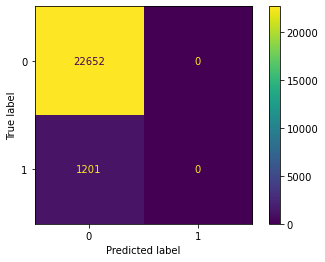

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test_transformed, y_test)
plt.show()  

In [82]:
# print("precision: ",precision_score(y_test,predictions,pos_label="True")) #if we predicted that was a positive cases, how often it was true 
# print("recall: ",recall_score(y_test,predictions, pos_label="True")) #number of positive cases we correctly predict as positive
# print("f1: ",f1_score(y_test,predictions, pos_label="True")) #2*(precision-recall)/(precision+recall)

In [83]:
# predicted        |  0      |  1 |
# ------------------------------------
# actual    0     |  22652  |  0 |
# -----------------------------------
#           1    |  1201   |  0 |   
# ---------------------------------- 

# There are 23253 people to be predicted as who did not donate. 22652 of them did not donate. 1201 of them donated. 
# True positive=0, false negative=1201 => recall = 0, precision = 0
# The data is still imbalanced.

## Managing imbalance in the dataset. Check for the imbalance. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. Each time fit the model and see how the accuracy of the model has changed.

In [84]:
X_train_scale.head()


,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.784946,0.000000,0.412049,0.555556,0.0,0.000000,0.373737,0.363636,0.202020,0.050505,0.090909,0.045977,0.100810,0.106286,0.091405,0.111111,0.343434,0.565657,0.515152,0.494949,0.979798,0.010101,0.010101,0.010101,0.010101,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.010526,0.000000,0.000000,0.000000,0.369048,0.452381,0.488095,0.380952,0.500000,0.535714,0.422535,0.373737,0.424242,0.202020,0.101010,0.272727,0.252525,0.161616,0.111111,0.070707,0.040404,0.141414,0.171717,0.363636,0.202020,0.131313,0.171717,0.060606,0.151515,0.171717,0.323232,0.525253,0.333333,0.131313,0.050505,0.595960,0.111111,0.054795,0.262626,0.321538,0.411429,0.626263,0.626263,0.020202,0.060606,0.040404,0.010101,0.060606,0.060606,0.000000,0.140000,0.166167,0.307692,0.230769,0.797980,0.212121,0.949495,0.060606,0.494949,0.454545,0.787879,0.666667,0.373737,0.828283,0.181818,0.090909,0.04,0.060606,0.141414,0.121212,0.050505,0.352113,0.626263,0.111111,0.000000,0.000000,0.000000,0.060606,0.141414,0.343434,0.595960,0.909091,0.010101,0.030303,0.515152,0.647059,0.622222,0.245902,0.125,0.050505,0.010101,0.313131,0.111111,0.040404,0.010101,0.050505,0.181818,0.353535,0.636364,0.848485,0.875536,0.161290,0.929625,0.234667,0.246000,0.254000,0.270667,0.083123,0.151515,0.171717,0.171717,0.272727,0.171717,0.072727,0.02,0.016393,0.000000,0.111111,0.151515,0.202020,0.303030,0.181818,0.080645,0.02,0.010101,0.010101,0.202020,0.060606,0.393939,0.060606,0.494949,0.515152,0.101010,0.747475,0.161616,0.010101,0.010101,0.0,0.0,0.00,0.040404,0.050505,0.012048,0.555556,0.322222,0.478873,0.223881,0.616162,0.646465,0.717172,0.565657,0.686869,0.525253,0.636364,0.525253,0.656566,0.989899,0.050505,0.090909,0.070707,0.030303,0.080808,0.151515,0.000000,0.018182,0.121212,0.050505,0.202020,0.060606,0.140351,0.050505,0.040404,0.0,0.080808,0.232323,0.080808,0.046875,0.060606,0.151515,0.040404,0.050505,0.020202,0.016393,0.060606,0.080808,0.030303,0.040404,0.050505,0.090909,0.040404,0.090909,0.707071,0.030303,0.000000,0.705882,0.121212,0.141414,0.323232,0.272727,0.216216,0.050505,0.020202,0.030928,0.242424,0.105263,0.277778,0.040404,0.000000,0.000000,0.0,0.191919,0.363636,0.066667,0.393939,0.202020,0.181818,0.131313,0.014085,0.040404,0.034483,0.132530,0.0,0.000000,0.06122

In [85]:
print(X_train_scale.shape)

(71559, 319)


In [86]:
y_train.head()

52605    0
41978    0
69887    0
19532    0
55144    0
Name: TARGET_B, dtype: int64

In [87]:
print(y_train.shape)

(71559,)


In [88]:
X_train_scale = pd.DataFrame(X_train_scale)

In [89]:
print(X_train_scale.shape)

(71559, 319)


In [90]:
y_train = pd.DataFrame(y_train)
y_train

,TARGET_B
52605,0
41978,0
69887,0
19532,0
55144,0
...,...
21440,0
73349,0
50057,0
5192,0


In [91]:
print(y_train.shape)

(71559, 1)


In [92]:
X_train_scale = X_train_scale.reset_index(drop=True) 

In [93]:
y_train = y_train.reset_index(drop=True) 

In [94]:
train_data = pd.concat([X_train_scale, y_train], axis=1)
train_data.shape

(71559, 320)

In [95]:
X_train_scale.isna().sum()

ODATEDW     0
TCODE       0
DOB         0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 319, dtype: int64

In [96]:
y_train.isna().sum()

TARGET_B    0
dtype: int64

In [97]:
print(train_data.shape)

(71559, 320)


In [98]:
train_data.isna().sum()

ODATEDW     0
TCODE       0
DOB         0
WEALTH1     0
HIT         0
           ..
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
TARGET_B    0
Length: 320, dtype: int64

In [99]:
from sklearn.utils import resample

category_0 = train_data[train_data['TARGET_B'] == 0] # all rows which target b is 0
category_1 = train_data[train_data['TARGET_B'] == 1] # all rows which target b is 1

# split data into two categories

<AxesSubplot:>

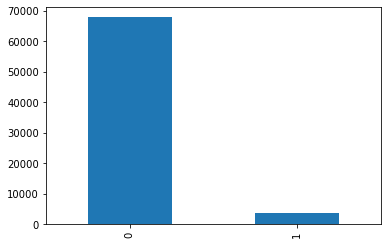

In [100]:
count_classes = train_data['TARGET_B'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

### Downsampling (undersampling)

In [101]:
category_0_undersampled = resample(category_0, 
                                   replace=False,
                                   n_samples = len(category_1),
                                    random_state=0)

In [102]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3642, 320)
(3642, 320)


In [103]:
# both sets are now of a reasonable size
display(category_1.shape)
display(category_0_undersampled.shape)
category_0_undersampled.head(5)


(3642, 320)

(3642, 320)

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
30053,0.928315,0.000014,0.000000,0.555556,0.0,0.020202,0.202020,0.575758,0.040404,0.060606,0.010101,0.057471,0.019443,0.022175,0.017258,1.0,0.000000,0.00000,0.505051,0.505051,0.959596,0.000000,0.000000,0.040404,0.050505,0.045455,0.0,0.010101,0.000000,0.021739,0.000000,0.0,0.031579,0.000000,0.0,0.011628,0.392857,0.476190,0.500000,0.380952,0.511905,0.535714,0.450704,0.414141,0.414141,0.181818,0.090909,0.202020,0.333333,0.171717,0.121212,0.060606,0.030303,0.131313,0.191919,0.363636,0.202020,0.121212,0.141414,0.030303,0.121212,0.111111,0.262626,0.636364,0.424242,0.161616,0.030303,0.707071,0.070707,0.054795,0.202020,0.403077,0.448571,0.919192,0.717172,0.000000,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.389167,0.428500,0.538462,0.615385,0.939394,0.070707,0.979798,0.030303,0.111111,0.535354,0.868687,0.787879,0.484848,0.949495,0.060606,0.050505,0.02,0.040404,0.080808,0.090909,0.030303,0.366197,0.606061,0.101010,0.000000,0.000000,0.000000,0.646465,0.838384,0.959596,1.000000,1.000000,0.343434,0.000000,0.848485,0.835294,0.788889,0.295082,0.100,0.030303,0.060606,0.000000,0.030303,0.000000,0.030303,0.000000,0.888889,0.909091,0.939394,0.959596,0.167382,0.078341,0.683314,0.478000,0.516000,0.510667,0.552667,0.161406,0.060606,0.040404,0.050505,0.151515,0.222222,0.418182,0.16,0.081967,0.111111,0.010101,0.020202,0.040404,0.141414,0.242424,0.435484,0.18,0.050505,0.131313,0.151515,0.020202,0.696970,0.000000,0.262626,0.747475,0.010101,0.898990,0.040404,0.030303,0.000000,0.042254,0.021277,0.0,0.010101,0.030303,0.012048,0.181818,0.277778,0.450704,0.149254,0.666667,0.727273,0.848485,0.595960,0.848485,0.585859,0.505051,0.393939,1.000000,0.000000,0.020202,0.232323,0.181818,0.020202,0.202020,0.141414,0.023256,0.000000,0.050505,0.010101,0.070707,0.070707,0.017544,0.000000,0.010101,0.000000,0.070707,0.202020,0.010101,0.031250,0.070707,0.131313,0.131313,0.030303,0.040404,0.049180,0.101010,0.060606,0.090909,0.010101,0.040404,0.010101,0.000000,0.131313,0.767677,0.060606,0.010101,0.858824,0.050505,0.050505,0.212121,0.202020,0.189189,0.252525,0.181818,0.072165,0.282828,0.315789,0.319444,0.050505,0.0,0.0,0.0,0.111111,0.222222,0.033333,0.282828,0.313131,0.303030,0.000000,0.000000,0.020202,0.000000,0.168675

In [104]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
data_downsampled.tail()

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
71484,0.354839,0.000000,0.175180,0.777778,0.041494,0.0,0.393939,0.121212,0.323232,0.010101,0.090909,0.057471,0.010142,0.012076,0.012400,1.0,0.0,0.0,0.484848,0.525253,0.949495,0.000000,0.010101,0.040404,0.020202,0.000000,0.013889,0.010101,0.000000,0.000000,0.0,0.0,0.010526,0.0,0.0,0.011628,0.452381,0.523810,0.559524,0.476190,0.559524,0.583333,0.253521,0.474747,0.353535,0.181818,0.080808,0.212121,0.212121,0.171717,0.151515,0.131313,0.050505,0.161616,0.242424,0.323232,0.161616,0.121212,0.242424,0.070707,0.222222,0.282828,0.393939,0.333333,0.161616,0.060606,0.020202,0.595960,0.131313,0.082192,0.222222,0.240000,0.325714,0.646465,0.636364,0.040404,0.292929,0.242424,0.242424,0.000000,0.000000,0.000000,0.227333,0.233000,0.384615,0.384615,0.696970,0.313131,0.979798,0.030303,0.000000,0.252525,0.656566,0.555556,0.212121,0.818182,0.191919,0.040404,0.00,0.040404,0.161616,0.252525,0.060606,0.211268,0.595960,0.212121,0.000000,0.000000,0.000000,0.060606,0.383838,0.828283,0.969697,1.000000,0.000000,0.040404,0.525253,0.717647,0.644444,0.213115,0.100,0.050505,0.242424,0.070707,0.050505,0.030303,0.222222,0.000000,0.515152,0.949495,0.969697,0.989899,0.811159,0.161290,0.929625,0.214000,0.314000,0.256000,0.314000,0.113367,0.121212,0.191919,0.222222,0.171717,0.242424,0.090909,0.02,0.000000,0.000000,0.030303,0.141414,0.151515,0.212121,0.383838,0.129032,0.02,0.000000,0.000000,0.272727,0.020202,0.686869,0.030303,0.414141,0.595960,0.050505,0.797980,0.080808,0.060606,0.060606,0.000000,0.0,0.00,0.030303,0.040404,0.012048,0.646465,0.288889,0.521127,0.283582,0.535354,0.737374,0.727273,0.747475,0.727273,0.727273,0.919192,0.494949,1.000000,1.000000,0.000000,0.141414,0.151515,0.020202,0.181818,0.161616,0.000000,0.000000,0.202020,0.000000,0.090909,0.010101,0.052632,0.020202,0.000000,0.0,0.040404,0.090909,0.040404,0.031250,0.050505,0.272727,0.040404,0.010101,0.000000,0.016393,0.080808,0.080808,0.212121,0.040404,0.010101,0.090909,0.050505,0.080808,0.676768,0.090909,0.000000,0.805882,0.010101,0.101010,0.292929,0.242424,0.324324,0.161616,0.090909,0.030928,0.151515,0.052632,0.125000,0.080808,0.0,0.0,0.0,0.181818,0.393939,0.066667,0.121212,0.202020,0.323232,0.131313,0.014085,0.050505,0.000000,0.192771,0.000000,0.000000,0.08

In [105]:
data_downsampled['TARGET_B'].value_counts()


0    3642
1    3642
Name: TARGET_B, dtype: int64

In [106]:
X_downsample = data_downsampled.drop(columns=['TARGET_B'])
y_downsample = data_downsampled['TARGET_B']

<AxesSubplot:>

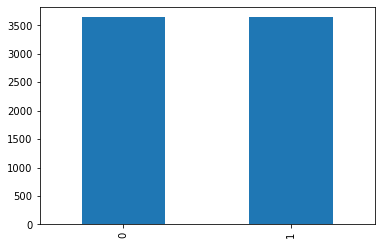

In [107]:
count_classes = data_downsampled['TARGET_B'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [108]:
y_downsample.dtypes

dtype('int64')

In [109]:
y_downsample.isnull().sum()

0

In [110]:
X_downsample.isnull().sum()

ODATEDW     0
TCODE       0
DOB         0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 319, dtype: int64

In [111]:
X_downsample.dtypes

ODATEDW     float64
TCODE       float64
DOB         float64
WEALTH1     float64
HIT         float64
             ...   
AVGGIFT     float64
CONTROLN    float64
HPHONE_D    float64
RFA_2F      float64
CLUSTER2    float64
Length: 319, dtype: object

In [112]:
y_test.shape

(23853,)

In [113]:
LR_down = LogisticRegression(random_state=0, solver='lbfgs')
classification = LR_down.fit(X_downsample, y_downsample)
predictions = LR_down.predict(X_test_scale)

# print("precision: ",precision_score(y_test,predictions,pos_label="True"))
# print("recall: ",recall_score(y_test,predictions,pos_label="True"))
# print("f1: ",f1_score(y_test,predictions,pos_label="True"))

# The PRECISION is the ratio tp / (tp + fp) where tp is the number of true positives and 
# fp the number of false positives. The precision is intuitively the ability of the classifier not to 
# label as positive a sample that is negative.

# The RECALL is the ratio tp / (tp + fn) where tp is the number of true positives and 
# fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

# The F1 SCORE can be interpreted as a harmonic mean of the precision and recall.
# The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)

# The parameters reach their best value at 1 and worst score at 0. 

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[13595  9057]
 [  521   680]]


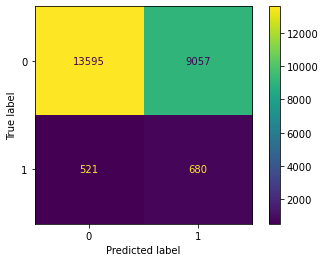

In [114]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test_scale, y_test)
plt.show()  

In [115]:
# There are 9737 people to be predicted as those donated. 680 of them donated. 9057 of them did not donate. That's why precision is 0.07.
# There are 14116 people to be predicted as those not donated. 521 of them donated. 13595 of them did not donate.
# True positive=680, false negative=521 => recall = 0.57

# After downsampling, precision rate, the classifier not to label as positive a sample that is negative, increases, but it is still low.
# After downsampling, recall rate, the ability of the classifier to find all the positive samples, increases, but it is still low.


### Upsampling (oversampling)

In [116]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0),
                                    random_state=0)
# resample category 1. 

In [117]:
print(category_0.shape)
print(category_1_oversampled.shape)

(67917, 320)
(67917, 320)


In [118]:
# both sets are now of a reasonable size
display(category_0.shape)
display(category_1_oversampled.shape)
category_1_oversampled.head(5)

(67917, 320)

(67917, 320)

,ODATEDW,TCODE,DOB,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B
54378,0.928315,0.000000,0.473841,0.777778,0.029046,0.040404,0.333333,0.262626,0.363636,0.080808,0.060606,0.022989,0.012999,0.011403,0.018953,1.000000,0.000000,0.000000,0.494949,0.515152,0.949495,0.020202,0.010101,0.020202,0.070707,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.042105,0.0,0.0,0.023256,0.428571,0.464286,0.523810,0.488095,0.511905,0.559524,0.098592,0.474747,0.393939,0.131313,0.141414,0.282828,0.151515,0.131313,0.111111,0.121212,0.050505,0.202020,0.212121,0.292929,0.191919,0.111111,0.232323,0.101010,0.212121,0.373737,0.434343,0.202020,0.060606,0.010101,0.010101,0.363636,0.181818,0.082192,0.404040,0.200000,0.272857,0.666667,0.020202,0.010101,0.303030,0.303030,0.181818,0.0,0.0,0.0,0.251667,0.259500,0.615385,0.615385,0.666667,0.343434,0.969697,0.040404,0.151515,0.090909,0.404040,0.313131,0.050505,0.525253,0.484848,0.040404,0.02,0.030303,0.282828,0.373737,0.232323,0.084507,0.676768,0.212121,0.000000,0.010101,0.0,0.101010,0.515152,0.979798,1.000000,1.000000,0.000000,0.020202,0.242424,0.529412,0.533333,0.196721,0.10,0.191919,0.111111,0.000000,0.151515,0.050505,0.121212,0.000000,0.898990,0.939394,0.969697,0.969697,0.781116,0.023041,0.936436,0.276000,0.348000,0.300000,0.352000,0.145067,0.151515,0.101010,0.161616,0.171717,0.272727,0.236364,0.02,0.000000,0.000000,0.101010,0.030303,0.161616,0.181818,0.353535,0.225806,0.08,0.000000,0.000000,0.212121,0.000000,0.606061,0.151515,0.606061,0.404040,0.252525,0.848485,0.040404,0.000000,0.000000,0.0,0.0,0.04,0.070707,0.030303,0.012048,0.010101,0.177778,0.239437,0.014925,0.585859,0.696970,0.727273,0.656566,0.707071,0.626263,0.616162,0.464646,0.353535,1.0,0.141414,0.313131,0.202020,0.111111,0.141414,0.171717,0.0,0.000000,0.020202,0.040404,0.010101,0.000000,0.000000,0.000000,0.010101,0.015385,0.030303,0.050505,0.040404,0.000000,0.040404,0.080808,0.202020,0.040404,0.010101,0.081967,0.141414,0.121212,0.161616,0.030303,0.080808,0.060606,0.020202,0.090909,0.656566,0.111111,0.000000,0.941176,0.010101,0.020202,0.141414,0.171717,0.243243,0.363636,0.212121,0.113402,0.181818,0.000000,0.041667,0.252525,0.020619,0.040404,0.000000,0.171717,0.333333,0.033333,0.262626,0.181818,0.363636,0.101010,0.028169,0.050505,0.034483,0.096386,0.0,0.214286,0.081633,0.018182,0.

In [119]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)
data_upsampled.isna().sum().sum()

0

In [120]:
data_upsampled['TARGET_B'].value_counts()

0    67917
1    67917
Name: TARGET_B, dtype: int64

In [121]:
X_upsample = data_upsampled.drop(columns=['TARGET_B'])
y_upsample = data_upsampled['TARGET_B']

<AxesSubplot:>

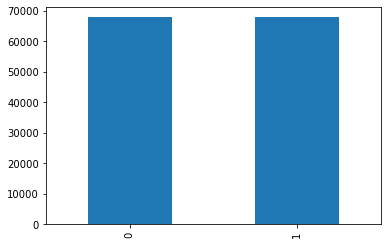

In [122]:
count_classes = data_upsampled['TARGET_B'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [123]:
y_upsample.dtypes

dtype('int64')

In [124]:
X_upsample.dtypes

ODATEDW     float64
TCODE       float64
DOB         float64
WEALTH1     float64
HIT         float64
             ...   
AVGGIFT     float64
CONTROLN    float64
HPHONE_D    float64
RFA_2F      float64
CLUSTER2    float64
Length: 319, dtype: object

In [125]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
classification = LR_over.fit(X_upsample, y_upsample)
predictions = LR_over.predict(X_test_scale)

# print("precision: ",precision_score(y_test,predictions,pos_label="True"))
# print("recall: ",recall_score(y_test,predictions,pos_label="True"))
# print("f1: ",f1_score(y_test,predictions,pos_label="True"))

# The PRECISION is the ratio tp / (tp + fp) where tp is the number of true positives and 
# fp the number of false positives. The precision is intuitively the ability of the classifier not to 
# label as positive a sample that is negative.

# The RECALL is the ratio tp / (tp + fn) where tp is the number of true positives and 
# fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

# The F1 SCORE can be interpreted as a harmonic mean of the precision and recall.
# The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)

# The parameters reach their best value at 1 and worst score at 0. 

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[14047  8605]
 [  564   637]]


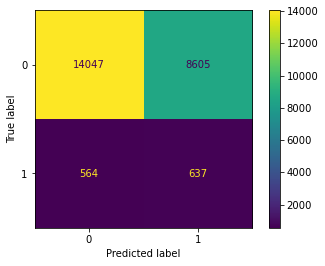

In [126]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test_scale, y_test)
plt.show()  

In [127]:
# There are 9242 people to be predicted as those donated. 637 of them donated. 8605 of them did not donate. That's why precision is 0.068.
# There are 14611 people to be predicted as those not donated. 564 of them donated. 14047 of them did not donate.
# True positive=637, false negative=564 => recall = 0.53

# After oversampling, precision rate, the classifier not to label as positive a sample that is negative, increases, but it is still low.
# After oversampling, recall rate, the ability of the classifier to find all the positive samples, increases, but it is still low.
